In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
stem = "/Users/bandari/Documents/git.repos/rrlfe/"

In [3]:
# read in data

file_name = stem + "ew_products/all_sdss_spectra_20211118_restacked_ew_info_good_only_w_net_balmer_errors.csv"

In [4]:
df = pd.read_csv(file_name)

In [5]:
df.keys()

Index(['realization_spec_file_name', 'orig_spec_file_name', 'EW_Hbeta',
       'err_EW_Hbeta_from_robo', 'EW_Hdelta', 'err_EW_Hdelta_from_robo',
       'EW_Hgamma', 'err_EW_Hgamma_from_robo', 'EW_Heps',
       'err_EW_Heps_from_robo', 'EW_CaIIK', 'err_EW_CaIIK_from_robo',
       'EW_Balmer', 'err_EW_Balmer_based_Robo',
       'err_EW_Balmer_based_noise_churning'],
      dtype='object')

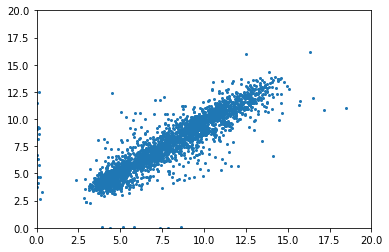

In [6]:
plt.scatter(df["EW_Hdelta"], df["EW_Hgamma"], s=4)
plt.xlim([0,20])
plt.ylim([0,20])
plt.show()

In [7]:
# np.logical_and(df["EW_Hdelta"] > 0.5, df["EW_Hdelta"] < 20.)
# np.logical_and(df["EW_Hgamma"] > 0.5, df["EW_Hgamma"] < 20.)

In [18]:
# get rid of really bad points

idx_cond = np.logical_and(
                        np.logical_and(df["EW_Hdelta"] > 0.5, df["EW_Hdelta"] < 20.),
                        np.logical_and(df["EW_Hgamma"] > 0.5, df["EW_Hgamma"] < 20.)
                        )

In [19]:
W_gamma = df["EW_Hgamma"].where(idx_cond).dropna()
W_delta = df["EW_Hdelta"].where(idx_cond).dropna()
err_W_gamma = df["err_EW_Hgamma_from_robo"].where(idx_cond).dropna()
err_W_delta = df["err_EW_Hdelta_from_robo"].where(idx_cond).dropna()

In [20]:
coeff, cov = np.polyfit(W_delta, W_gamma, deg=1, full=False, cov=True)
m = coeff[0]
b = coeff[1]
err_m = np.sqrt(np.diag(cov))[0]
err_b = np.sqrt(np.diag(cov))[1]

In [23]:
cov[0,1]*len(err_W_gamma)

-1.0710303377647705

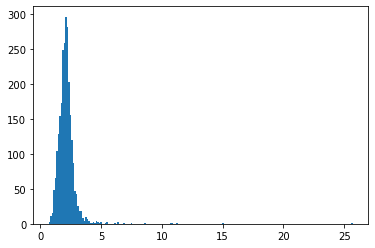

In [13]:
plt.hist(err_W_gamma, bins=200)
plt.show()

In [15]:
len(err_W_gamma)*np.median()

2568

In [24]:
cov

array([[ 5.20144066e-05, -4.17067889e-04],
       [-4.17067889e-04,  3.76094547e-03]])

In [28]:
np.divide(np.cov(W_delta,W_gamma),len(W_gamma))

array([[0.00312134, 0.00267308],
       [0.00267308, 0.0027058 ]])

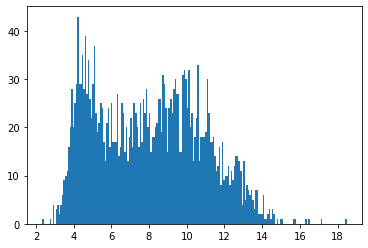

In [27]:
plt.hist(W_delta, bins=200)
plt.show()

In [37]:
x_test = np.ones(1000)*np.random.normal(size=1000)
y_test = np.add(4.3*x_test,np.random.normal(size=1000))

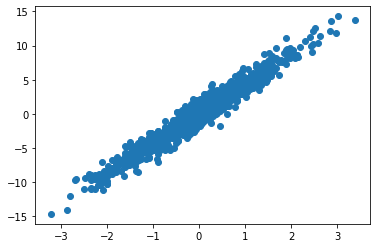

In [38]:
plt.scatter(x_test,y_test)
plt.show()

In [39]:
coeff, cov = np.polyfit(x_test, y_test, deg=1, full=False, cov=True)

In [40]:
coeff

array([4.3317161 , 0.01900331])

In [41]:
cov

array([[9.44673621e-04, 5.41226235e-05],
       [5.41226235e-05, 9.90098424e-04]])

In [46]:
coeff2, cov2 = np.polyfit(W_delta, W_gamma, deg=1, full=False, cov=True)

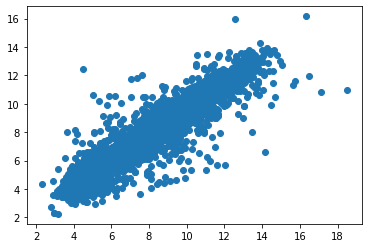

In [47]:
plt.scatter(W_delta, W_gamma)
plt.show()

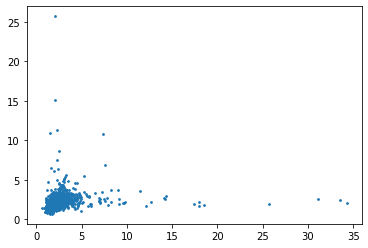

In [72]:
plt.scatter(err_W_delta, err_W_gamma, s=3)
plt.show()

In [73]:
np.cov(err_W_delta, err_W_gamma)

array([[2.67884462, 0.22860484],
       [0.22860484, 0.73623591]])

In [ ]:
coeff, cov = np.polyfit(x_test, y_test, deg=1, full=False, cov=True)err_W_gamma

In [45]:
cov2

array([[ 6.92170118e-05, -5.36144161e-04],
       [-5.36144161e-04,  4.63365589e-03]])

In [51]:
np.shape([x_test,y_test]) # each row is a variable; each col is an observation

(2, 1000)

In [54]:
test_matrix = np.cov([x_test,y_test])

In [67]:
test_matrix_line = np.cov([W_delta,W_gamma])
test_matrix_error = np.cov([err_W_delta,err_W_gamma])

In [68]:
# Jacobian

F_matrix = 0.5*np.matrix([[1,1]])

In [69]:
C_matrix = np.copy(test_matrix_line)
C_matrix[0,1] = 
C_matrix[1,0] = 
var_B = np.matmul(F_matrix,np.matmul(,F_matrix.T))

In [70]:
print(var_B)

[[7.17325787]]


In [66]:
print(test_matrix_line)
print(test_matrix_error)

[[8.01559039 6.86447169]
 [6.86447169 6.94849769]]
[[2.67884462 0.22860484]
 [0.22860484 0.73623591]]


In [57]:
print(np.sqrt(test_matrix[0,0]))
print(np.std(x_test))

1.0226673998910085
1.0221559382936816


In [58]:
print(np.sqrt(test_matrix[1,1]))
print(np.std(y_test))

4.539831107290182
4.537560623973732


In [60]:
print(test_matrix[0,1])
print(np.divide(test_matrix[0,1],len(x_test)))

4.530319260822795
0.004530319260822795


In [56]:
np.std(x_test)

1.0221559382936816

In [52]:
x = np.array([[0, 2], [1, 1], [2, 0]]).T

In [53]:
np.cov(x)

array([[ 1., -1.],
       [-1.,  1.]])

In [18]:
# Propagate the error in the equation
#
# W_B = (1/2)*(W_delta + W_gamma_prime)
#
# as
#
# var_B = sigma_B^2 = F_matrix * C_matrix * (F_matrix^T)
#
# where F_matrix is the Jacobian matrix and C_matrix is the variance-covariance matrix

In [19]:
# Jacobian

F_matrix = 0.5*np.matrix([[1,1]])

In [20]:
# variance-covariance matrix

C_matrix = np.copy(cov_scaled)

In [21]:
# find variance of net balmer line

var_B = np.matmul(F_matrix,np.matmul(C_matrix,F_matrix.T))

In [22]:
var_B

matrix([[0.00101541]])

In [26]:
sigma_B = np.sqrt(var_B[0,0])

In [27]:
sigma_B

0.03186550687604238

In [25]:
np.sqrt(var_B).shape

(1, 1)

In [28]:
np.sqrt(C_matrix[0,0])

0.008421514907883813

In [29]:
np.sqrt(C_matrix[1,1])

0.0716105345726555

In [30]:
# check the answer manually

var_B_manual = 0.25*(C_matrix[0,0] + C_matrix[1,1]) + 0.5*C_matrix[0,1]

In [31]:
var_B_manual

0.001015410528467104

In [32]:
np.sqrt(var_B_manual)

0.03186550687604238

In [ ]:
# ... but note that this just yields one net variance, var_B, for all the data points.
# We want an error for *each* data point, so when we find the net variance of the 
# Balmer line, use error values from a single line for var_delta and var_gamma_prime


for line_num in range(0,len(err_W_gamma)):
    C_matrix_1 = np.copy(cov_scaled) # '_1' for 'one line'; here we just want to keep the covariance terms
    C_matrix_1[0,0] = np.power(W_gamma_prime,2.)
    C_matrix_1[0,0] = np.power(err_W_delta_prime,2.)
    var_B_each_pt = np.matmul(F_matrix,np.matmul(C_matrix,F_matrix.T))


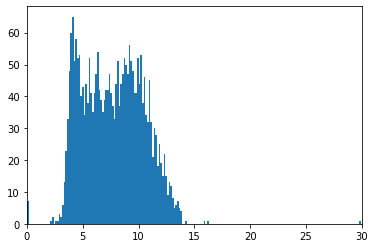

In [42]:
plt.clf()
plt.hist(df["EW_Hgamma"], bins=200)
plt.xlim([0,30])
plt.show()

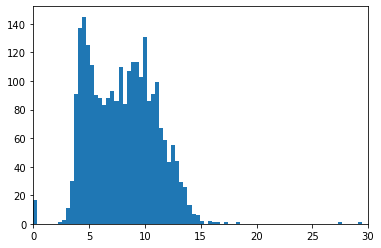

In [41]:
plt.clf()
plt.hist(df["EW_Hdelta"], bins=200)
plt.xlim([0,30])
plt.show()

In [43]:
m

0.8563900293407558

In [ ]:
df["EW_Hgamma"]